## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures. 

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## Part 1: Data Visualization and Analysis

> "Visualization gives you answers to questions you didn’t know you had." ~ Ben Schneiderman
>

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is car_price.csv.


In [5]:
# Load the dataset
car_price_df = pd.read_csv('car_price.csv')

<b> 1.1 Plot the distribution of the following features as a small multiple of histograms. </b>
1. carlength 
2. carwidth
3. stroke 
4. curbweight

<b></b>

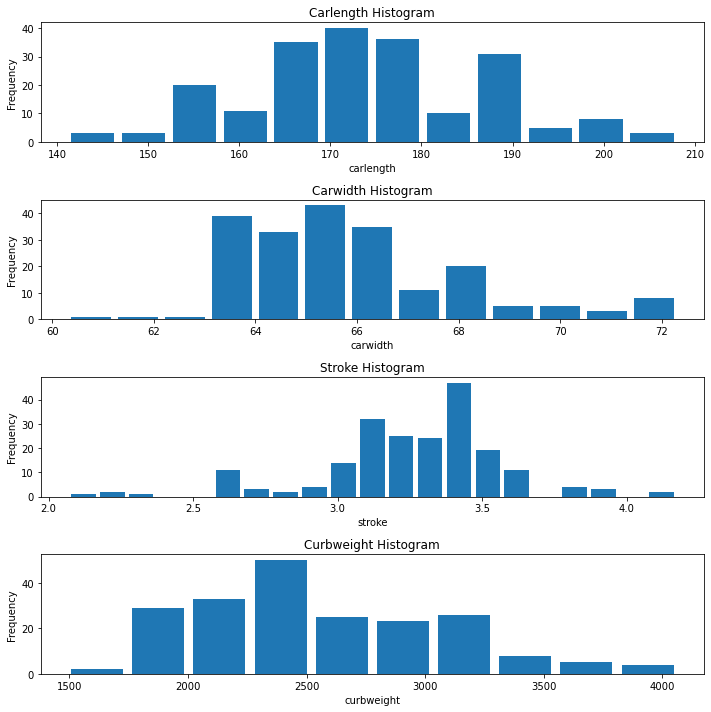

In [21]:
### Code here
fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1,figsize=(10,10))
#carlength
ax1.hist(car_price_df["carlength"],bins="auto",rwidth=0.85)
ax1.set_xlabel("carlength")
ax1.set_ylabel("Frequency")
ax1.set_title("Carlength Histogram")
#carwidth
ax2.hist(car_price_df["carwidth"],bins="auto",rwidth=0.85)
ax2.set_xlabel("carwidth")
ax2.set_ylabel("Frequency")
ax2.set_title("Carwidth Histogram")
#stroke
ax3.hist(car_price_df["stroke"],bins="auto",rwidth=0.85)
ax3.set_xlabel("stroke")
ax3.set_ylabel("Frequency")
ax3.set_title("Stroke Histogram")
#curbweight
ax4.hist(car_price_df["curbweight"],bins="auto",rwidth=0.85)
ax4.set_xlabel("curbweight")
ax4.set_ylabel("Frequency")
ax4.set_title("Curbweight Histogram")
plt.tight_layout()

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables </b>
1. fueltype 
2. drivewheel
3. enginelocation


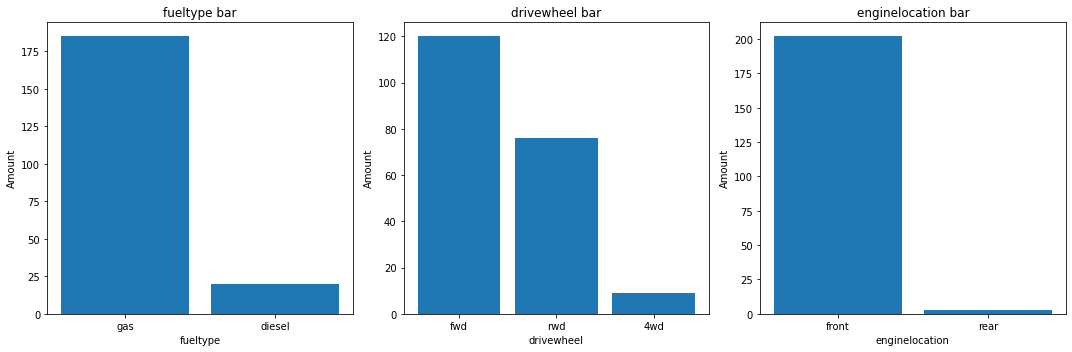

In [26]:
### Code here
fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
#fueltype
df_count=car_price_df["fueltype"].value_counts()
ax1.bar(df_count.index,df_count.values, width=0.85)
ax1.set_xlabel("fueltype")
ax1.set_ylabel("Amount")
ax1.set_title("fueltype bar")
#drivewheel
df_count=car_price_df["drivewheel"].value_counts()
ax2.bar(df_count.index,df_count.values, width=0.85)
ax2.set_xlabel("drivewheel")
ax2.set_ylabel("Amount")
ax2.set_title("drivewheel bar")
#enginelocation
df_count=car_price_df["enginelocation"].value_counts()
ax3.bar(df_count.index,df_count.values, width=0.85)
ax3.set_xlabel("enginelocation")
ax3.set_ylabel("Amount")
ax3.set_title("enginelocation bar")
plt.tight_layout()

<b> 1.3 Plot relationships between the following features and the target variable <em>price</em> as a small multiple of boxplots. </b>
1. cylindernumber 
2. enginetype

<b> Note: Make sure to order the x-axis labels in increasing order for cylindernumber. </b>

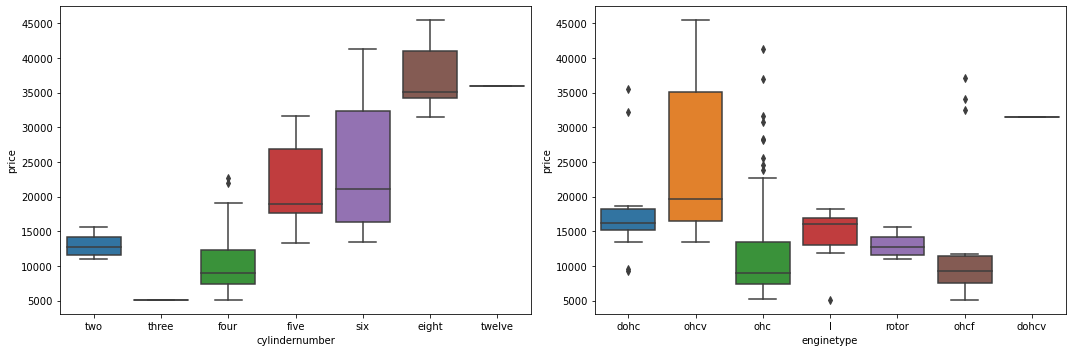

In [29]:
### Code here
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
#cylindernumber
sns.boxplot(data=car_price_df,x="cylindernumber",y="price",order=["two","three","four","five","six","eight","twelve"],ax=ax1)
#enginetype
sns.boxplot(data=car_price_df,x="enginetype",y="price",ax=ax2)
plt.tight_layout()

<b> 1.4 What do you infer from the visualization above. Comment on the skewness of the distributions (histograms), class imbalance (bar charts), and relationship between categories and price of the car (boxplots). </b>

#### Comment here
#skewness

For carlength data, it is approximately normal distributed with 0 skew.
For carwidth and Curbweight data, they are positively skewed.
For stroke data, it is negatively skewed.

#class imbalance

For Fueltype, the number of cars using gas is 7 times that using diesel.
For drivewheel, the number of cars using fwd is more than that using rwd, the number of cars using rwd is much more than that using 4wd.
For enginelocation, most of cars having engine in the front, only a small amount having engine in the rear.
From the graphs, we can see that the imbalance of Fueltype and enginelocation are obvious.The imbalance of drivewheel is not that obvious but still exists.

#relationship between categories and price

The number of cylinders approximately positively correlates with the price of the car. The type of engine dose not correlate with the price of the car.


------------------------------------------------------------------------------------------------------------------

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression
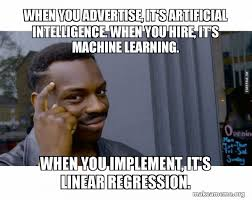



In part 1, we will use two datasets - synthetic and Car Price to train and evaluate our linear regression model.

### Synthetic Data

<b>2.1.1 Generate 100 samples of synthetic data using the following equations. </b>

$ \epsilon ∼ \mathcal{N}(0,4) $

$ y = 7x - 8 + \epsilon $

You may use [np.random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for generating $\epsilon$. 

In [30]:
np.random.seed(0)
X = np.linspace(0, 15, 100)
epsilon = np.random.normal(0.0,4.0,100)
y = 7*X-8+epsilon
epsilon,y

(array([  7.05620938,   1.60062883,   3.91495194,   8.9635728 ,
          7.47023196,  -3.90911152,   3.80035367,  -0.60542883,
         -0.41287541,   1.64239401,   0.57617428,   5.81709403,
          3.0441509 ,   0.48670007,   1.77545293,   1.33469731,
          5.97631629,  -0.82063306,   1.25227081,  -3.41638296,
        -10.21195926,   2.61447438,   3.4577448 ,  -2.96866008,
          9.0790185 ,  -5.8174627 ,   0.18303407,  -0.7487354 ,
          6.13111686,   5.87743508,   0.6197897 ,   1.51265008,
         -3.55114299,  -7.92318587,  -1.3916486 ,   0.62539588,
          4.92116272,   4.8095194 ,  -1.54930727,  -1.209211  ,
         -4.19421186,  -5.68007175,  -6.82508076,   7.80310158,
         -2.03860873,  -1.75229721,  -5.01118144,   3.10996142,
         -6.45559139,  -0.85096112,  -3.58186624,   1.54760999,
         -2.04322055,  -4.72252874,  -0.11272891,   1.71332748,
          0.26606889,   1.20988759,  -2.53728837,  -1.45096466,
         -2.68984179,  -1.43821265,  -3.

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
*   Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.2 Plot y vs X in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?**

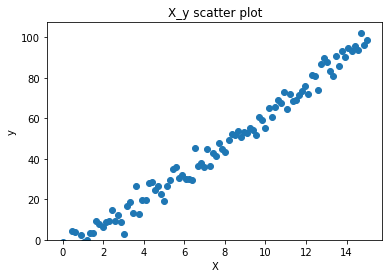

In [31]:
### Code here
plt.scatter(X,y)
plt.ylim(bottom=0)
plt.xlabel("X")
plt.ylabel("y")
plt.title("X_y scatter plot")
plt.show()

#### Comment here

It is clear that y has positive linear relationship with X


### Car Price Prediction Dataset

The objective of this dataset is to predict the price of a car based on its characterisitics. We will use linear regression to predict the price using its features. 

In [6]:
# split data into features and labels
car_price_X = car_price_df.drop(columns=['price'])
car_price_y = car_price_df['price']

**2.1.3 Plot the relationships between the label (price) and the continuous features (citympg, highwaympg, enginesize, horsepower) using a small multiple of scatter plots. Make sure to label the axes.**

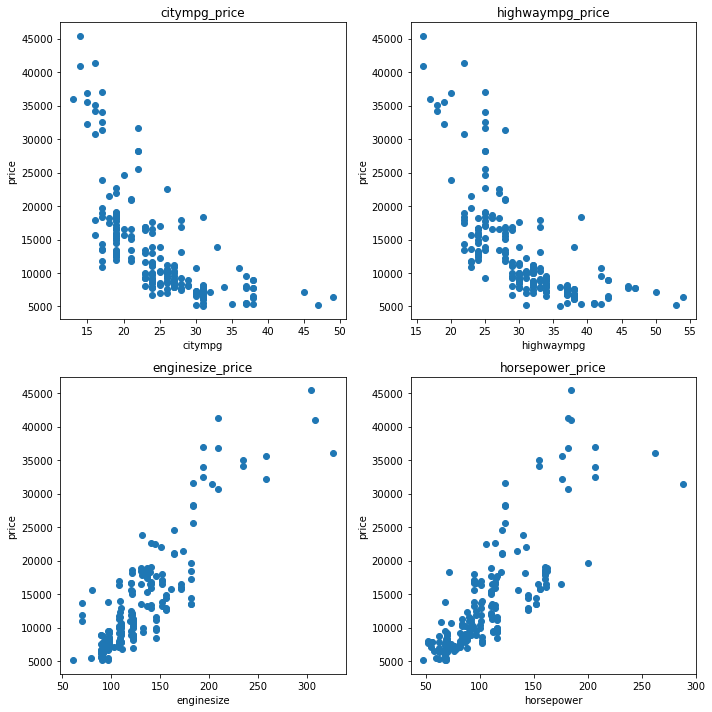

In [35]:
### Code here
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
ax1.scatter(car_price_X["citympg"],car_price_y)
ax1.set_xlabel("citympg")
ax1.set_ylabel("price")
ax1.set_title("citympg_price")
ax2.scatter(car_price_X["highwaympg"],car_price_y)
ax2.set_xlabel("highwaympg")
ax2.set_ylabel("price")
ax2.set_title("highwaympg_price")
ax3.scatter(car_price_X["enginesize"],car_price_y)
ax3.set_xlabel("enginesize")
ax3.set_ylabel("price")
ax3.set_title("enginesize_price")
ax4.scatter(car_price_X["horsepower"],car_price_y)
ax4.set_xlabel("horsepower")
ax4.set_ylabel("price")
ax4.set_title("horsepower_price")
plt.tight_layout()

**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

#### Comment here

We can see from the graphs that for variables citympg and highwaympg, the prices have approximately negative linear relationship with the variables.
For variables enginesize and horsepower, the prices have approximately positive linear relationship with the variables.
However, it should be noticed that for all four variables there exist some kinds of noises.


### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:

**Note: Generate the synthetic data before running the next cell to avoid errors.**


In [36]:
X = X.reshape((100, 1))   # Turn the X vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Only one feature vector

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [55.47920661 13.42527931 26.39143796 36.62805794 65.38959977]


**2.1.5 Encode the categorical variables of the CarPrice dataset.**
### Here we use ordinal_encoding to encode doornumber and cylindernumber cause they have certain orders. For carname, cause the first name is more vital instead of the whole name, we use one hot encoding to encode the first name categories. For the rest categorical variables, we use one hot encoding.

In [7]:
### Code here
# We use ordinal encoding to encode doornumber and cylindernumber, we use one hot encoding to encode the rest categorical variables
ord_categories = ['doornumber', 'cylindernumber']
one_hot_categories = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']
#We need to extract 1st name of cars from their model now for proper encoding
carname_df=pd.DataFrame(car_price_X["CarName"].str.split(pat=" ",expand=True)[0])
ord_enc = OrdinalEncoder()
ord_features = ord_enc.fit_transform(car_price_X[ord_categories])
ohe = OneHotEncoder()
oh_features = ohe.fit_transform(pd.concat([car_price_X[one_hot_categories],carname_df],axis=1))
ord_features.shape, oh_features.toarray().shape,carname_df.value_counts()

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


((205, 2),
 (205, 57),
 toyota         31
 nissan         17
 mazda          15
 honda          13
 mitsubishi     13
 subaru         12
 peugeot        11
 volvo          11
 dodge           9
 volkswagen      9
 buick           8
 bmw             8
 plymouth        7
 audi            7
 saab            6
 isuzu           4
 porsche         4
 chevrolet       3
 jaguar          3
 alfa-romero     3
 vw              2
 renault         2
 maxda           2
 porcshce        1
 toyouta         1
 vokswagen       1
 mercury         1
 Nissan          1
 dtype: int64)

**2.1.6 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**
### Absolute correlation is considered because both positive and negative correlation show high correlation

In [8]:
### Code here
ord_df=pd.DataFrame(ord_features,columns=ord_categories)
oh_df=pd.DataFrame(oh_features.toarray(),columns=ohe.get_feature_names_out())
car_price_num=car_price_X.select_dtypes("number")
car_price_X = pd.concat([ord_df, oh_df,car_price_num], axis=1)
#drop CarID column cause that is specific with each car
car_price_X=car_price_X.drop(columns=['car_ID'])
corr=car_price_X.corr().abs()
corr.to_csv("corr_car_price_data.csv")
fig = plt.figure(figsize=(20,20), dpi=512)
sns.heatmap(corr, cmap='coolwarm')
plt.show()
print(corr[(corr >= 0.9) & (corr != 1)].stack())
#we drop six columns with high correlation
car_price_X=car_price_X.drop(['highwaympg',"compressionratio","x3_rwd","x1_std","x7_honda","x7_peugeot"], axis=1)
car_price_X

x0_diesel         compressionratio    0.984356
x0_gas            compressionratio    0.984356
x1_std            x1_turbo            1.000000
x1_turbo          x1_std              1.000000
x3_fwd            x3_rwd              0.911996
x3_rwd            x3_fwd              0.911996
x5_l              x7_peugeot          0.954956
x6_1bbl           x7_honda            0.915112
x6_idi            compressionratio    0.984356
x7_honda          x6_1bbl             0.915112
x7_peugeot        x5_l                0.954956
compressionratio  x0_diesel           0.984356
                  x0_gas              0.984356
                  x6_idi              0.984356
citympg           highwaympg          0.971337
highwaympg        citympg             0.971337
dtype: float64


,doornumber,cylindernumber,x0_diesel,x0_gas,x1_turbo,x2_convertible,x2_hardtop,x2_hatchback,x2_sedan,x2_wagon,...,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,peakrpm,citympg
0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,168.8,64.1,48.8,2548,130,3.47,2.68,111,5000,21
1,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,168.8,64.1,48.8,2548,130,3.47,2.68,111,5000,21
2,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,171.2,65.5,52.4,2823,152,2.68,3.47,154,5000,19
3,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,176.6,66.2,54.3,2337,109,3.19,3.40,102,5500,24
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,176.6,66.4,54.3,2824,136,3.19,3.40,115,5500,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,188.8,68.9,55.5,2952,141,3.78,3.15,114,5400,23
201,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,188.8,68.8,55.5,3049,141,3.78,3.15,160,5300,19
202,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,188.8,68.9,55.5,3012,173,3.58,2.87,134,5500,18
203,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,188.8,68.9,55.5,3217,145,3.01,3.40,106,4800,26


#### Comment here

From the plotted correlation matrix we find that the variable citympg and highwaympg are highly correlated with a correlation coefficient 0.971337.
Thus, we drop highwaympg. Reasons are as below:
1.Assumptions of Linear Regression: Independence: the x are independently drawn, and not dependent on each other. 
2.the features which are highly correlated are some what linearly dependent with other features. These features contribute very less in predicting the output but increses the computational cost.


**2.1.7 Split the dataset into training (60%), validation (20%), and test (20%) sets. Use random_state = 0.**

In [66]:
### Code here
car_price_X_dev, car_price_X_test, car_price_y_dev, car_price_y_test= train_test_split(car_price_X,car_price_y,test_size=0.2, random_state=0)
car_price_X_train, car_price_X_val, car_price_y_train, car_price_y_val=train_test_split(car_price_X_dev,car_price_y_dev,test_size=0.25,random_state=0)

**2.1.8 Standardize the columns in the feature matrices.**

In [67]:
### Code here
scaler=StandardScaler()
car_price_X_train=scaler.fit_transform(car_price_X_train)
car_price_X_val=scaler.transform(car_price_X_val)
car_price_X_test=scaler.transform(car_price_X_test)

**2.1.9 Add a column of ones to the feature matrices for the bias term.**

In [68]:
### Code here
car_price_X_train = np.hstack([np.ones((car_price_X_train.shape[0], 1)), car_price_X_train])
car_price_X_val = np.hstack([np.ones((car_price_X_val.shape[0], 1)), car_price_X_val])
car_price_X_test = np.hstack([np.ones((car_price_X_test.shape[0], 1)), car_price_X_test])

print(car_price_X_train[:5, :2], '\n\n', car_price_y_train[:5])

[[ 1.    1.25]
 [ 1.   -0.8 ]
 [ 1.   -0.8 ]
 [ 1.   -0.8 ]
 [ 1.   -0.8 ]] 

 42     10345.0
14     24565.0
199    18950.0
60      8495.0
117    18150.0
Name: price, dtype: float64


At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Car Price Prediction dataset: car_price_X_train, car_price_X_val, car_price_X_test, car_price_y_train, car_price_y_val, car_price_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.10 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [69]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        self.w = np.linalg.inv(X.T @ X + self.alpha * np.identity(X.shape[1])) @ X.T @ y
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        return X @ self.w
        

### Train, Evaluate, and Interpret LR Model

**2.1.11 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.**

In [50]:
### Code here
LR=LinearRegression()
LR.train(X_train,y_train)
y_pred=LR.predict(X_test)
print(f"first 3 predictions on X_test are {y_pred[:3]}, first 3 actual y_test are {y_test[:3]}")
print(f"last 3 predictions on X_test are {y_pred[-3:]}, last 3 actual y_test are {y_test[-3:]}")

first 3 predictions on X_test are [19.79646675 82.65106352 -5.34537196], first 3 actual y_test are [19.75879164 87.9272395  -1.96383594]
last 3 predictions on X_test are [17.70131352 27.12950304  0.94008772], last 3 actual y_test are [26.53356395 19.07681413  0.07197308]


**2.1.12 Plot a scatter plot of y_test vs. X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.** 

>If your line goes through the data points, you have likely implemented the linear regression correctly!

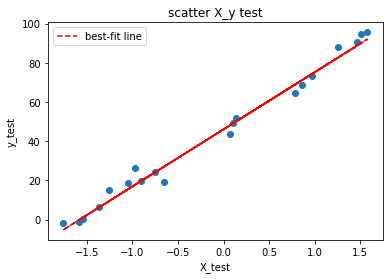

In [52]:
### Code here
plt.scatter(X_test[:,1],y_test)
plt.xlabel("X_test")
plt.ylabel("y_test")
plt.title("scatter X_y test")
plt.plot(X_test[:,1],y_pred, "r--",label="best-fit line")
plt.legend()
plt.show()

**2.1.13 Train a linear regression model ($\alpha = 0$) on the car price training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [74]:
### Code here
LR=LinearRegression(alpha=1e-12)
LR.train(car_price_X_train, car_price_y_train)
car_price_y_train_pred=LR.predict(car_price_X_train)
car_price_y_val_pred=LR.predict(car_price_X_val)
car_price_y_test_pred=LR.predict(car_price_X_test)
print(f"R^2 on training set is {r2_score(car_price_y_train, car_price_y_train_pred)}")
print(f"R^2 on validation set is {r2_score(car_price_y_val, car_price_y_val_pred)}")
print(f"R^2 on test set is {r2_score(car_price_y_test, car_price_y_test_pred)}")
print(f"First 3 predictions on test set are: {car_price_y_test_pred[:3]}; first 3 actual labels are : {car_price_y_test[:3]}")
print(f"Last 3 predictions on test set are: {car_price_y_test_pred[-3:]}; last 3 actual labels are : {car_price_y_test[-3:]}")


R^2 on training set is 0.9793051213723123
R^2 on validation set is 0.8947342069186414
R^2 on test set is 0.8218669135105232
First 3 predictions on test set are: [ 6394.78675065 16226.57524676 14249.75589089]; first 3 actual labels are : 52      6795.0
181    15750.0
5      15250.0
Name: price, dtype: float64
Last 3 predictions on test set are: [ 4513.47696704 35023.38420732  8891.4354463 ]; last 3 actual labels are : 22     6377.0
74    45400.0
44     8916.5
Name: price, dtype: float64


**2.1.14 As a baseline model, use the mean of the training labels (car_price_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [54]:
### Code here
car_price_y_train_pred=np.mean(car_price_y_train)
print(f"R^2 on training set is {r2_score(car_price_y_train, np.array([car_price_y_train_pred]*car_price_y_train.shape[0]))}")
print(f"R^2 on validation set is {r2_score(car_price_y_val,np.array([car_price_y_train_pred]*car_price_y_val.shape[0]))}")
print(f"R^2 on test set is {r2_score(car_price_y_test, np.array([car_price_y_train_pred]*car_price_y_test.shape[0]))}")

R^2 on training set is 0.0
R^2 on validation set is -0.04252409813108615
R^2 on test set is -0.0028042246944892657


**2.1.15 Interpret your model trained on the car price dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

Text(0.5, 0, 'feature')

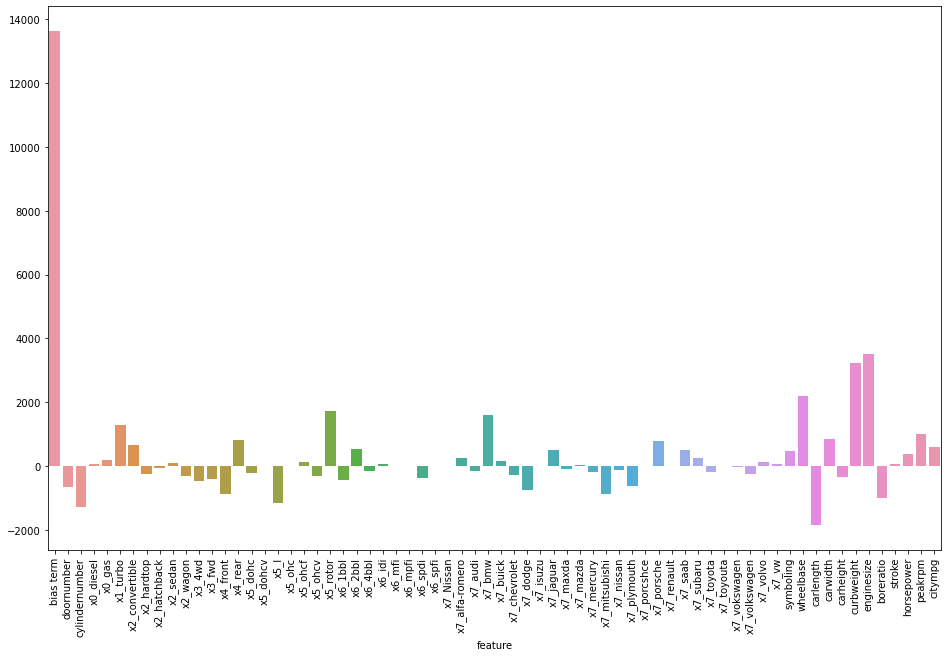

In [75]:
### Code here
fig=plt.figure(figsize=(16,10))
name=["bias term"]
name.extend(list(car_price_X.columns))
ax=sns.barplot(x=name,y=LR.w)
ax.tick_params(axis="x",rotation=90)
plt.xlabel("feature")

**2.1.16 According to your model, which features are the greatest contributors to the car price?**

#### Comment here

From the bar plot, we can see that enginesize and curbweight are the greatest contributors to the car price.

### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the car price dataset.

**2.1.17 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

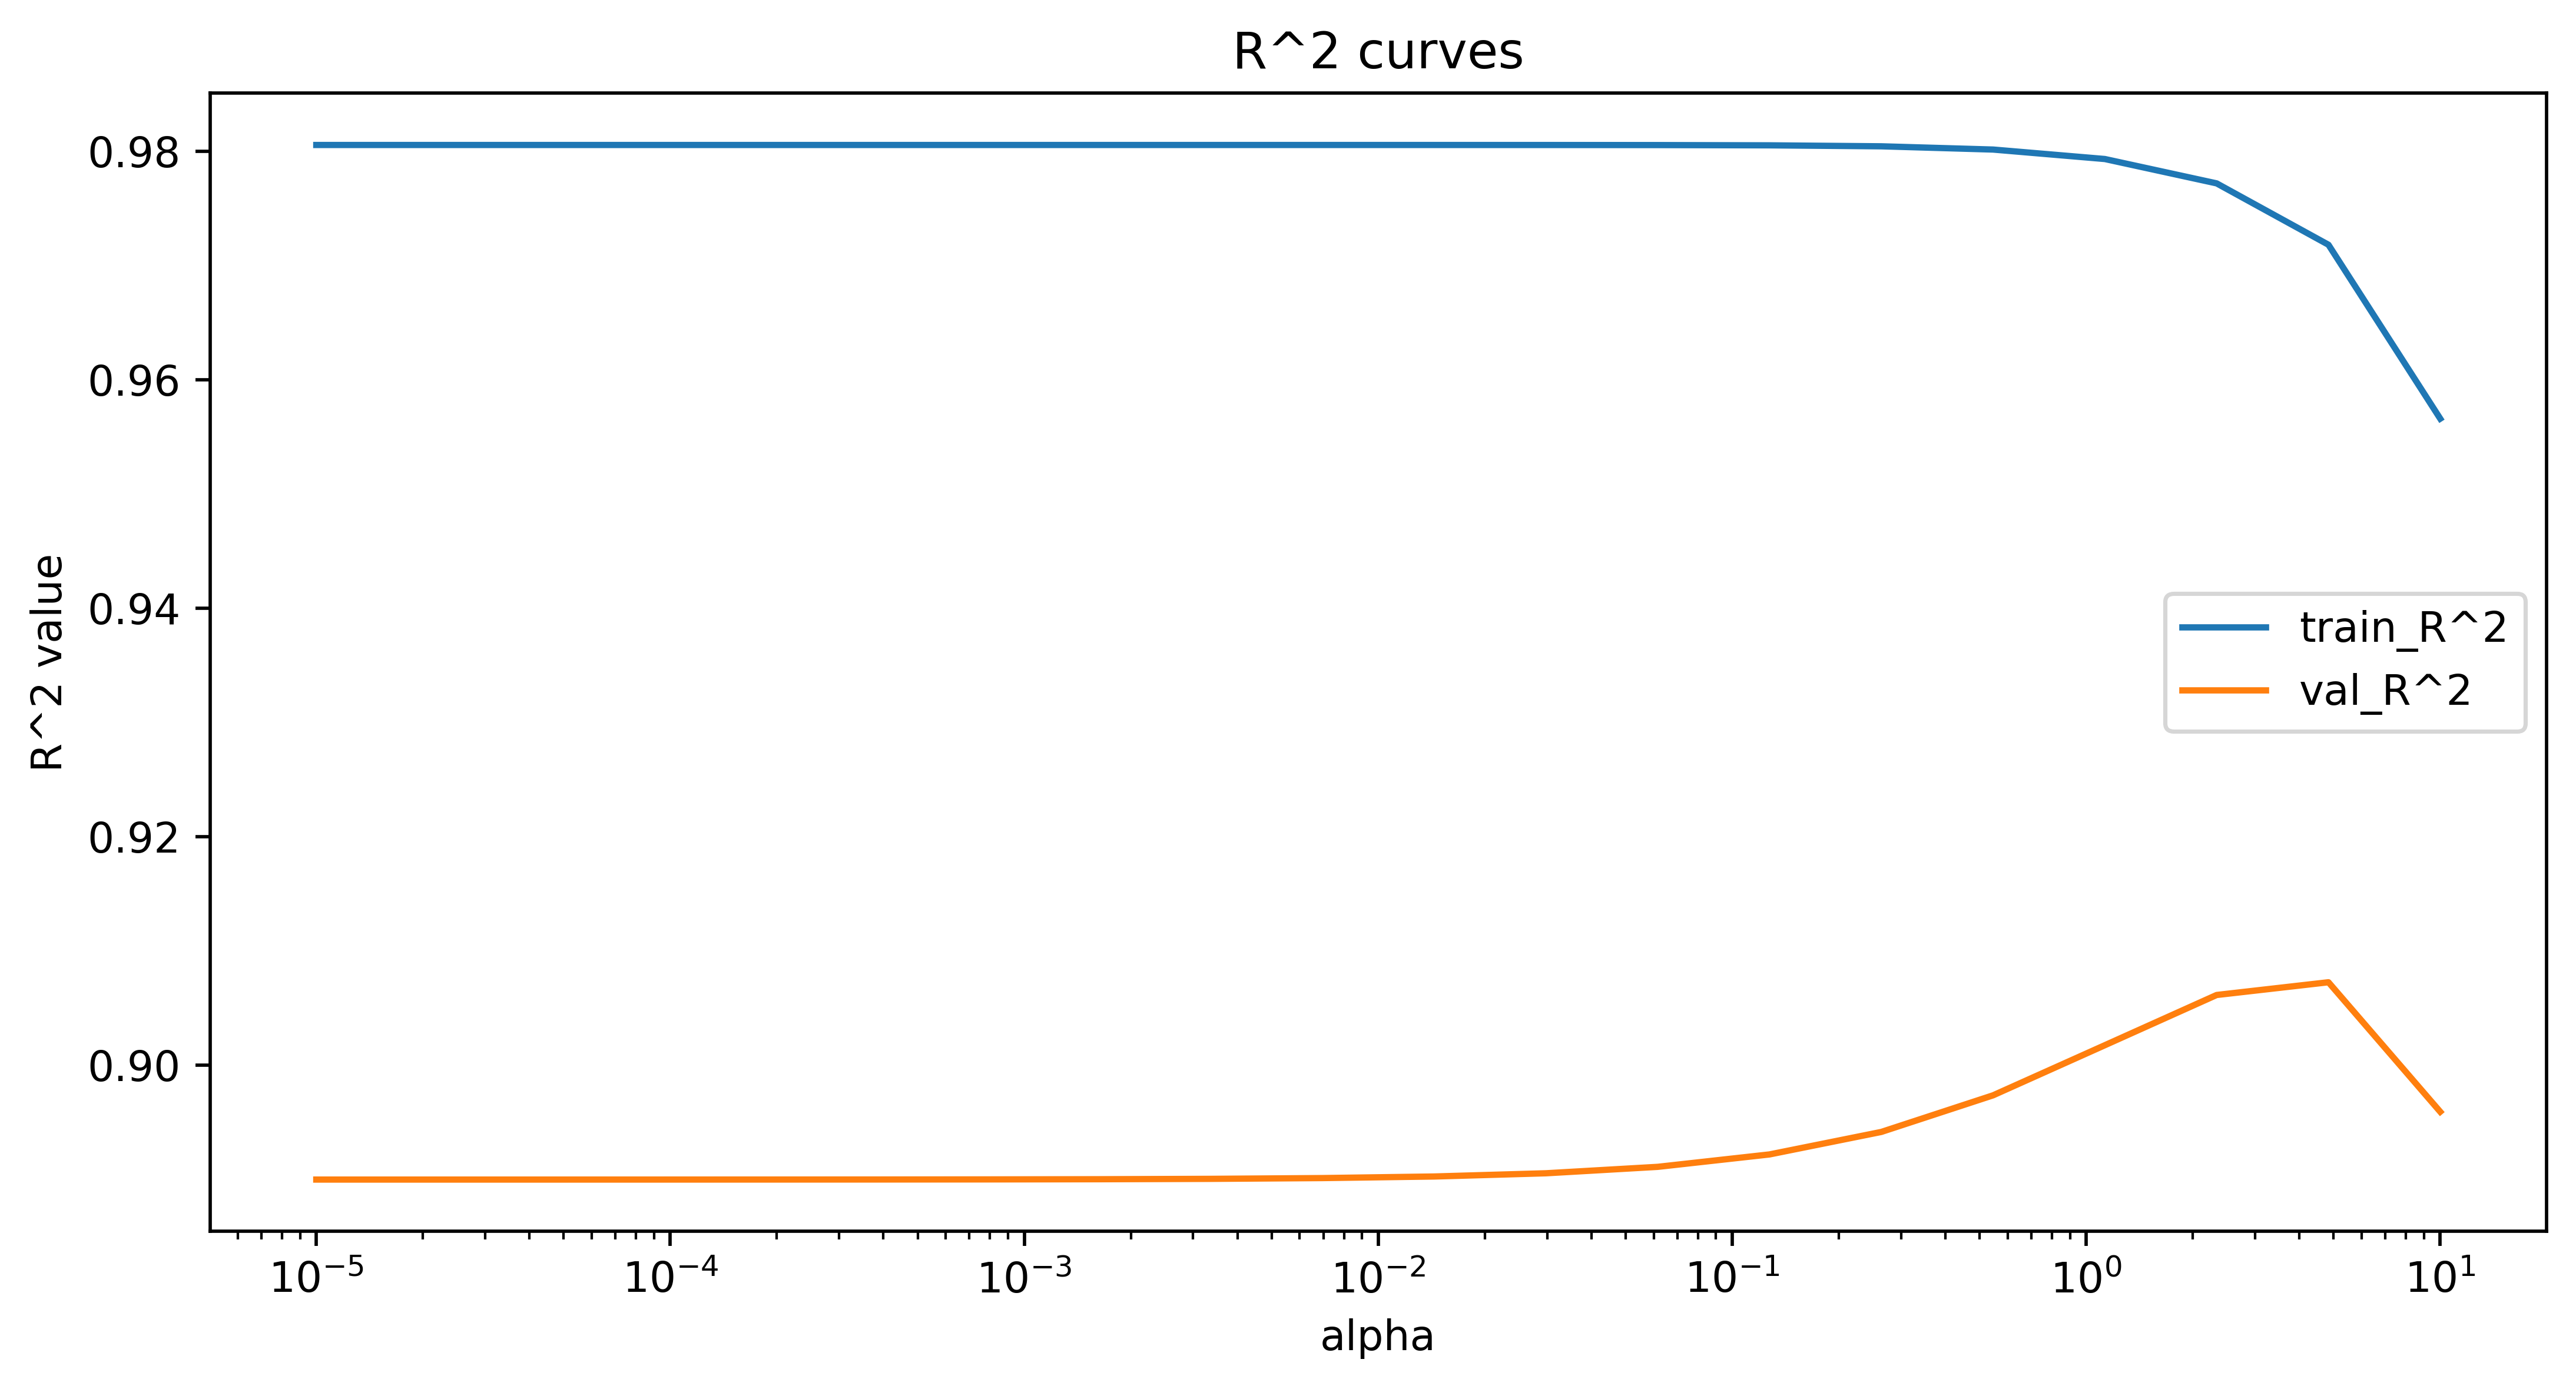

In [76]:
### Code here
train_score=[]
val_score=[]
for a in np.logspace(-5,1,20):
    LR=LinearRegression(alpha=a)
    LR.train(car_price_X_train,car_price_y_train)
    car_price_y_train_pred=LR.predict(car_price_X_train)
    car_price_y_val_pred=LR.predict(car_price_X_val)
    train_score.append(r2_score(car_price_y_train,car_price_y_train_pred))
    val_score.append(r2_score(car_price_y_val,car_price_y_val_pred))
fig = plt.figure(figsize=(10, 5), dpi=512)
plt.plot(np.logspace(-5,1,20),train_score,label="train_R^2")
plt.plot(np.logspace(-5,1,20),val_score,label="val_R^2")
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("R^2 value")
plt.title("R^2 curves")
plt.legend()
plt.show()

**2.1.18 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

#### Comment here

It shown from above curves that training R^2 stays at the same level in the interval [le-5, le0], and then decrease monotonically with decreasing model complexity(increasing alpha) approximately starting from the point le0.
Validation R^2 first stays at the same level in the period (le-5,le-1) and then increase in the period (le-1,le0.5), and then decrease in(le0.5,le1) with decreasing model complexity(increasing alpha).

### 2.2 Logistic Regression

In this part, we will be using a heart disease dataset for classification. 

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides information about patients, over 4,000 records and 15 attributes.


**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral:
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history):
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

Predict variable (desired target):
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [39]:
heart_disease_df = pd.read_csv('heart_disease.csv')
heart_disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Missing Value Analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)**

In [40]:
### Code here
print(heart_disease_df.isna().sum())
values={
    "education": int(heart_disease_df["education"].mode()),
    "cigsPerDay": float(heart_disease_df["cigsPerDay"].mean()),
    "BPMeds": int(heart_disease_df["BPMeds"].mode()),
    "totChol": float(heart_disease_df["totChol"].mean()),
    "BMI": float(heart_disease_df["BMI"].mean()),
    "heartRate": float(heart_disease_df["heartRate"].mean()),
    "glucose": float(heart_disease_df["glucose"].mean())
}
heart_disease_df.fillna(value=values,inplace=True)
heart_disease_df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### Comment here

We see from above that there are 7 variables have missing data, we cannot just remove the data because for most of the missing values, that row only contain few missing values, if we delete that row, then many meaningful data will be deleted.
Therefore, instead of just removing, we can replace categorical missing data with the mode of the column while continous data with the mean of the column.

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.**

In [63]:
### Code here
heart_disease_df['TenYearCHD'].value_counts() / len(heart_disease_df)

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

#### Comment here

We can see that the distribution of labels is significantly imbalanced cause the number of patients that not have 10 year risk of coronary heart disease CHD(label=0) is much higher than that having the risk(label=1).

**2.2.3 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

In [41]:
### Code here
features_df=heart_disease_df.drop(columns=["TenYearCHD"])
y_df=heart_disease_df["TenYearCHD"]
corr = features_df.corr().abs()
print(corr[(corr >= 0.9) & (corr != 1)].stack())
corr.style.background_gradient(cmap='coolwarm')

Series([], dtype: float64)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,0.028979,0.013299,0.197596,0.316807,0.051545,0.004546,0.005313,0.015708,0.069974,0.035989,0.057933,0.081506,0.116601,0.005818
age,0.028979,1.000000,0.164809,0.213748,0.192366,0.120955,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,0.012819,0.116850
education,0.013299,0.164809,1.000000,0.019403,0.009980,0.010149,0.032881,0.078807,0.038147,0.023534,0.126197,0.062732,0.139487,0.049604,0.034299
currentSmoker,0.197596,0.213748,0.019403,1.000000,0.766970,0.048358,0.032988,0.103260,0.044295,0.046285,0.130230,0.107746,0.167276,0.062348,0.054157
cigsPerDay,0.316807,0.192366,0.009980,0.766970,1.000000,0.045663,0.032706,0.065947,0.037063,0.026025,0.088505,0.056391,0.092453,0.074851,0.056088
BPMeds,0.051545,0.120955,0.010149,0.048358,0.045663,1.000000,0.114609,0.258697,0.051394,0.078712,0.251503,0.192356,0.099647,0.015139,0.048856
prevalentStroke,0.004546,0.057655,0.032881,0.032988,0.032706,0.114609,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,0.017676,0.018055
prevalentHyp,0.005313,0.307194,0.078807,0.103260,0.065947,0.258697,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924
diabetes,0.015708,0.101258,0.038147,0.044295,0.037063,0.051394,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705
totChol,0.069974,0.260270,0.023534,0.046285,0.026025,0.078712,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583


#### Comment here

We can see from the correlation matrix that there are no highly correlated features(corr>=0.9).

**2.2.4 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [42]:
### Code here
#1.Convert the label from a Pandas series to a Numpy (m x 1) vector. 
y_df=y_df.to_numpy().reshape(-1,1)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(features_df, y_df, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5,:2], '\n\n', y_train[:5])

[[ 1.          1.15602641]
 [ 1.         -0.86503214]
 [ 1.         -0.86503214]
 [ 1.         -0.86503214]
 [ 1.         -0.86503214]] 

 [[0]
 [0]
 [0]
 [0]
 [1]]


### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [43]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.5 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

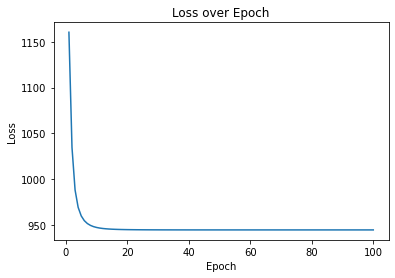

Accuracy on test set is 0.8443396226415094


In [72]:
### Code here
from sklearn.metrics import accuracy_score
LR=LogisticRegression()
loss=LR.train(X_train,y_train)
y_pred_A=LR.predict(X_test)
loss=list(np.concatenate(np.array(loss)))
plt.plot(np.arange(1,101),loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epoch")
plt.show()
test_accuracy_A=accuracy_score(y_test,y_pred_A)
print(f"Accuracy on test set is {test_accuracy_A}")

In [73]:
# Use the validation set to find the best hyperparameters
import random
params=[]
accuracy=[]
for i in range(20):
    alpha, eta, t=[random.uniform(0,1),random.uniform(0,0.001),random.randint(0,100)]
    params.append([alpha,eta,t])
    LR=LogisticRegression(alpha,t,eta)
    loss=LR.train(X_train,y_train)
    y_pred=LR.predict(X_val)
    accuracy.append(accuracy_score(y_val,y_pred))
print(f"The best hyperparameters [alpha,eta,t] are {params[np.argmax(accuracy)]}, the best accuracy on validation set is {np.max(accuracy)}")
# Use the best hyperparameters to predict the testset
alpha,eta,t=params[np.argmax(accuracy)]
LR=LogisticRegression(alpha=alpha,t=t,eta=eta)
LR.train(X_train,y_train)
y_test_pred_B=LR.predict(X_test)
print(f"The accuracy on test set using the best hyperparameters is {accuracy_score(y_test,y_test_pred_B)}")

The best hyperparameters [alpha,eta,t] are [0.7557216316839694, 0.00017215810989324666, 31], the best accuracy on validation set is 0.8573113207547169
The accuracy on test set using the best hyperparameters is 0.8419811320754716


### From part A and part B code, we have already calculate the accuracy score on test set, so we just print the corresponding accuracy score on test set for part C answer

In [74]:
print(f"Accuracy on test set on scenario A is {test_accuracy_A}; Accuracy on test set on scenario B is {accuracy_score(y_test,y_test_pred_B)}")

Accuracy on test set on scenario A is 0.8443396226415094; Accuracy on test set on scenario B is 0.8419811320754716


**2.2.6 Do you think the model is performing well keeping the class distribution in mind?**

#### Comment here

If we predict all the data as 0, we can get nearly 0.85 accuracy(can be calculated by
heart_disease_df[heart_disease_df.TenYearCHD==0].shape[0]/heart_disease_df.shape[0])=0.8480) which is close to the accuracy of the tuned model. So keeing the class distribution in mind, the model is not performing well.

> We will look into different evaluation metrics in Lecture 5 that will help us with such imbalanced datasets. 

### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

Text(0.5, 0, 'feature')

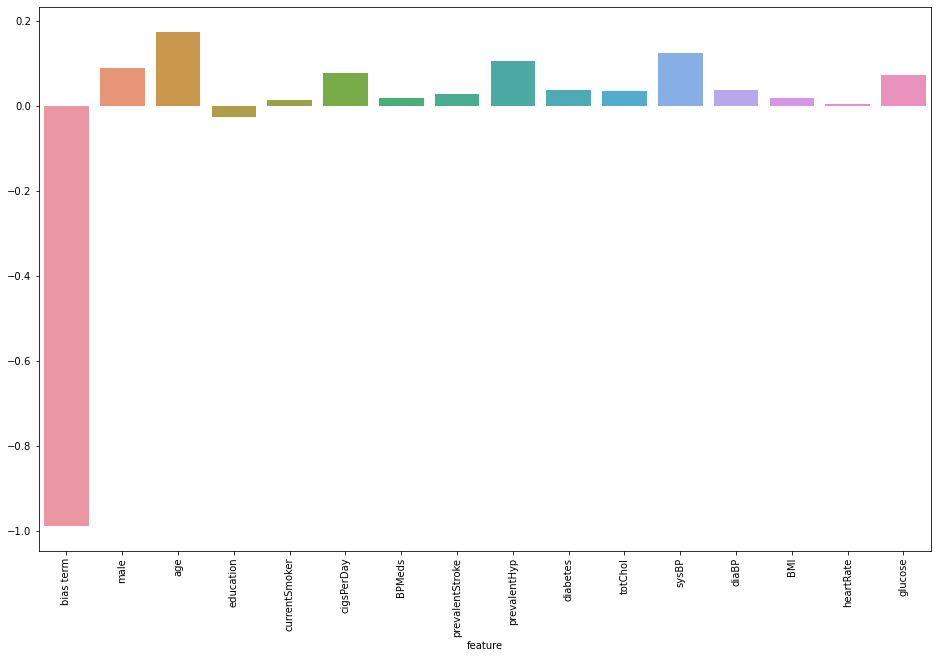

In [18]:
### Code here
fig=plt.figure(figsize=(16,10))
name=["bias term"]
name.extend(list(features_df.columns))
ax=sns.barplot(x=name,y=list(np.concatenate(LR.w)))
ax.tick_params(axis="x",rotation=90)
plt.xlabel("feature")

#### Comment here

The model shows that age is the most import feature to predict 10 year risk of coronary heart disease, followed by sysBP and prevalentHyp.


# **Part 3: Support Vector Machines**

In this part, we will be using support vector machines for classification on the heart disease dataset.

### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [75]:
### Code here
svm_model=LinearSVC(dual=False)
svm_model.fit(X_train,y_train)
y_train_pred=svm_model.predict(X_train)
y_val_pred=svm_model.predict(X_val)
y_test_pred=svm_model.predict(X_test)
print(f"Accuracy on training set is: {accuracy_score(y_train,y_train_pred)}")
print(f"Accuracy on validation set is: {accuracy_score(y_val,y_val_pred)}")
print(f"Accuracy on test set is: {accuracy_score(y_test, y_test_pred)}")

Accuracy on training set is: 0.8544453186467349
Accuracy on validation set is: 0.8502358490566038
Accuracy on test set is: 0.839622641509434


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [76]:
### Code here
svm_model=LinearSVC(dual=True)
svm_model.fit(X_train,y_train)
y_train_pred=svm_model.predict(X_train)
y_val_pred=svm_model.predict(X_val)
y_test_pred=svm_model.predict(X_test)
print(f"Accuracy on training set is: {accuracy_score(y_train,y_train_pred)}")
print(f"Accuracy on validation set is: {accuracy_score(y_val,y_val_pred)}")
print(f"Accuracy on test set is: {accuracy_score(y_test, y_test_pred)}")

Accuracy on training set is: 0.8548387096774194
Accuracy on validation set is: 0.8466981132075472
Accuracy on test set is: 0.839622641509434


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
